# Generating a logo from the Python extension for VS Code docs 

### Initial exploration for raw content of docs

In [ ]:
import httpx
import asyncio
from typing import Optional

async def fetch_docs_content(url: str) -> Optional[str]:
    try:
        async with httpx.AsyncClient() as client:
            response = await client.get(url)
            response.raise_for_status()
            return response.text
    except httpx.HTTPError as e:
        print(f"Error fetching content: {e}")
        return None

target_url = "https://code.visualstudio.com/docs/python/python-tutorial"
content = asyncio.run(fetch_docs_content(target_url))
if content:
    print("Successfully fetched documentation content")

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8" />
  <meta name="awa-expId" content="vscw_aaflight1016_treatment:103440;" />
  <meta name="awa-env" content="prod" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta name="google-site-verification" content="hNs7DXrTySP_X-0P_AC0WulAXvUwgSXEmgfcO2r79dw" />

  <!-- Twitter and Facebook OpenGraph Metadata-->
  <meta name="twitter:card" content="summary_large_image" />
  <meta name="twitter:site" content="@code" />

  <meta name="description" content="A Python hello world tutorial using the Python extension in Visual Studio Code" />
<meta name="keywords" content="" />
<meta name="ms.prod" content="vs-code" />
<meta name="ms.TOCTitle" content="Tutorial" />
<meta name="ms.ContentId" content="77828f36-ae45-4887-b25c-34545edd52d3" />
<meta name="ms.date" content="6/12/2023" />
<meta name="ms.topic" content="conceptual" />
<!-- Twitter and Facebook OpenGraph Metadata-->
<meta name="twitter:card" cont

In [35]:
if True:
    print('helo')

helo


#### 1. a) Parsing text with regex

In [36]:

# from https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44
def remove_tags(text):
    """Remove html tags and functions from a string"""
    import re
    clean = re.compile('(<.*?>)|\\n|\\r|\\t|\(|\)|\{|\}|\]|\[')
    return re.sub(clean, '', text)

r = httpx.get(url=target_url)
raw_content = r.content.decode("utf-8")

clean_raw_content = remove_tags(raw_content)


<>:5: SyntaxWarning: invalid escape sequence '\('
<>:5: SyntaxWarning: invalid escape sequence '\('
C:\Users\milively\AppData\Local\Temp\ipykernel_3960\2968894550.py:5: SyntaxWarning: invalid escape sequence '\('
  clean = re.compile('(<.*?>)|\\n|\\r|\\t|\(|\)|\{|\}|\]|\[')


#### 1. b) Parsing text with BeautifulSoup

In [37]:
from bs4 import BeautifulSoup as bs
r = httpx.get(target_url)
raw_content = r.content.decode("utf-8")
parsed_content = bs(r.content, features="html.parser")
clean_raw_content = "".join(parsed_content.findAll(text=True))

C:\Users\milively\AppData\Local\Temp\ipykernel_3960\1993584797.py:5: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  clean_raw_content = "".join(parsed_content.findAll(text=True))


In [38]:
from wordcloud import WordCloud, STOPWORDS
raw_words = clean_raw_content.split()

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="black", max_words=2000,
               stopwords=stopwords).generate(clean_raw_content)


#### Display simple word cloud

(-0.5, 399.5, 199.5, -0.5)

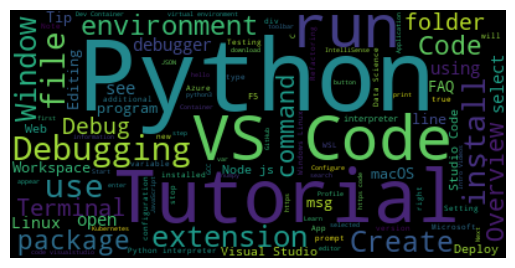

In [39]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Try with Python logo as a Mask

In [40]:
from PIL import Image, ImageFile
import numpy as np
# python_mask = np.array(Image.open("images/python-mask.png"))

wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords,  contour_width=3, contour_color='steelblue').generate(clean_raw_content)

Display word cloud with Python mask


(-0.5, 399.5, 199.5, -0.5)

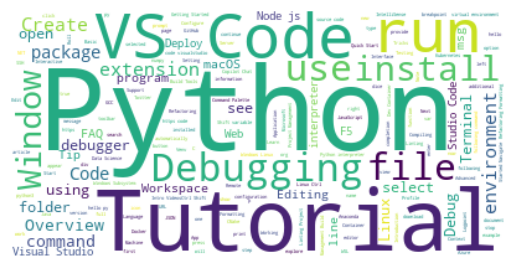

In [41]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Try with coloured Python mask 

In [42]:
from wordcloud import ImageColorGenerator
# python_mask = np.array(Image.open("images/python-colored-mask.png"))

wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords,  contour_width=10, contour_color='steelblue').generate(clean_raw_content)
# image_colors = ImageColorGenerator(python_mask)

In [43]:
# fig, axes = plt.subplots(1,1)

# axes.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# plt.axis('off')
# plt.show()